### Exploración tiempos espera

### Carga y Análisis General

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/eventos_despegues.csv')
df.columns

Index(['ICAO', 'ultimo_parado', 'despegue', 'tiempo_espera', 'fecha_despegue',
       'hora_despegue'],
      dtype='object')

In [3]:
df.head()

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
0,34644E,2024-12-05 15:44:24.247,2024-12-05 15:44:48.228,23.981,2024-12-05,15
1,34644E,2024-12-06 06:27:38.836,2024-12-06 06:28:59.316,80.480,2024-12-06,6
2,34644E,2024-12-06 10:50:54.131,2024-12-06 10:56:27.812,333.681,2024-12-06,10
3,3D7061,2024-12-05 13:59:53.147,2024-12-05 14:12:50.907,777.760,2024-12-05,14
4,4400DC,2024-12-05 23:08:41.904,2024-12-05 23:09:05.401,23.497,2024-12-05,23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ICAO            911 non-null    object 
 1   ultimo_parado   911 non-null    object 
 2   despegue        911 non-null    object 
 3   tiempo_espera   911 non-null    float64
 4   fecha_despegue  911 non-null    object 
 5   hora_despegue   911 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 42.8+ KB


Convertimos las columnas al tipo fecha

In [5]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            911 non-null    object        
 1   ultimo_parado   911 non-null    datetime64[ns]
 2   despegue        911 non-null    datetime64[ns]
 3   tiempo_espera   911 non-null    float64       
 4   fecha_despegue  911 non-null    object        
 5   hora_despegue   911 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 42.8+ KB


In [7]:
df['tiempo_espera'].describe()

count      911.000000
mean       411.290880
std       2714.242938
min          0.000000
25%         23.078000
50%         31.521000
75%        387.545500
max      64956.712000
Name: tiempo_espera, dtype: float64

**El máximo** es bastante sospechoso, tendremos que ver que ha pasado

**La mediana (50 %)** también parece decir cosas extrañas, que para la mitad de los datos los tiempos de espera no pasan del medio minuto

#### Despegues por horas

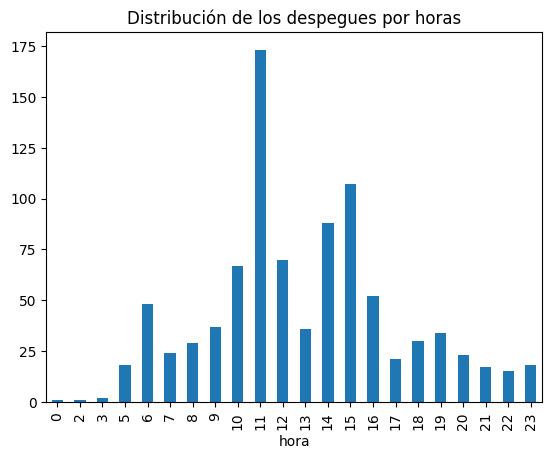

In [8]:
df.hora_despegue.value_counts().sort_index().plot(kind="bar")
plt.title('Distribución de los despegues por horas')
plt.xlabel('hora');

Vemos varias cosas:
- <ins>NO</ins> hay datos para **la 1 y las 4 de la mañana**
- El mayor número de despegues ocurre a las 11 de la mañana

In [9]:
df.despegue.dt.day_of_week.value_counts()

despegue
4    513
3    398
Name: count, dtype: int64

#### Despegues por días de la semana

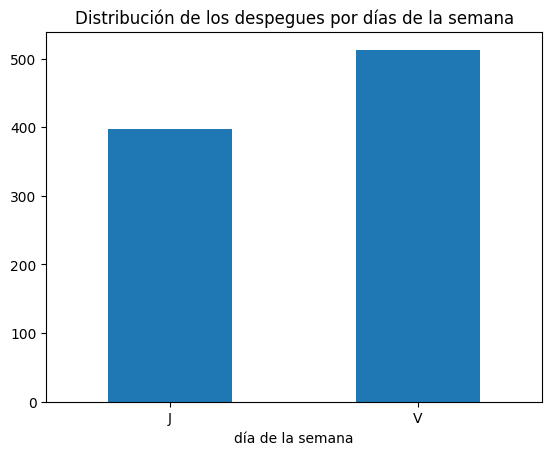

In [10]:
dias_semana = df.despegue.dt.day_of_week.value_counts().sort_index()
dias_semana.index = dias_semana.index.map(lambda x: ['L', 'M', 'X', 'J', 'V', 'S', 'D'][x])
dias_semana.plot(kind="bar")
plt.title('Distribución de los despegues por días de la semana')
plt.xticks(rotation=0)
plt.xlabel('día de la semana');

En este caso el **viernes** parece tener un poco más de vuelos que el jueves

**Unstacked bar plot**

### Histograma

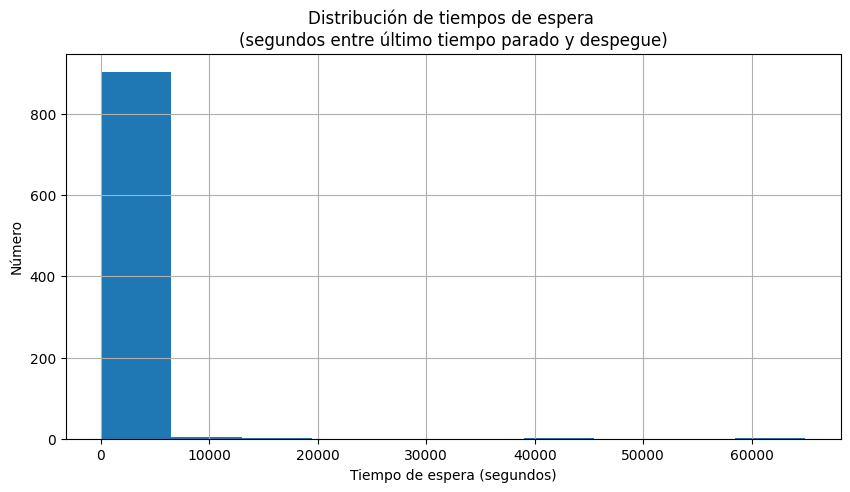

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df.tiempo_espera.hist(ax=ax);

#### Cogemos solo vuelos que se esperan menos de 30 minutos y más de 1

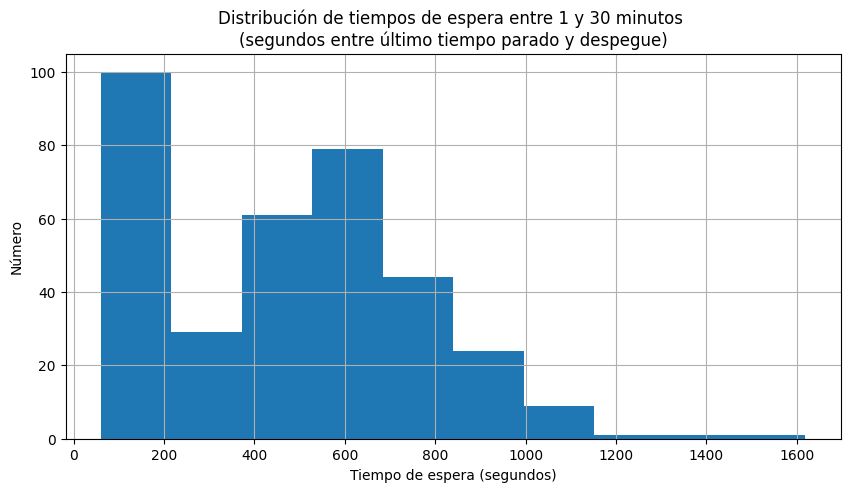

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera entre 1 y 30 minutos \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')

umbral_low, umbral_high = 1 * 60, 30 * 60
df_entre_5_20 = df[(df.tiempo_espera > umbral_low) & (df.tiempo_espera < umbral_high)]
df_entre_5_20.tiempo_espera.hist(ax=ax);

### Por avión

In [13]:
df['ICAO'].value_counts()

ICAO
345385    91
34604B     6
3452C7     6
344213     6
34750F     6
          ..
347387     1
344346     1
738055     1
4D2223     1
4CA708     1
Name: count, Length: 465, dtype: int64

**Bastante raro** que el avión `345385` haya hecho 91 despegues (casi el 10% del total) en 2 días en Madrid, vamos a verlo

In [14]:
df_345385 = df[df['ICAO'] == "345385"]
df_345385.head(10)

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
27,345385,2024-12-06 07:17:56.355,2024-12-06 07:23:23.023,326.668,2024-12-06,7
28,345385,2024-12-06 10:58:06.479,2024-12-06 10:58:07.202,0.723,2024-12-06,10
29,345385,2024-12-06 10:58:11.673,2024-12-06 10:58:11.673,0.000,2024-12-06,10
30,345385,2024-12-06 10:58:13.809,2024-12-06 10:58:13.809,0.000,2024-12-06,10
31,345385,2024-12-06 10:58:16.475,2024-12-06 10:58:16.927,0.452,2024-12-06,10
32,345385,2024-12-06 10:58:39.521,2024-12-06 10:58:40.069,0.548,2024-12-06,10
33,345385,2024-12-06 10:59:05.242,2024-12-06 10:59:05.761,0.519,2024-12-06,10
34,345385,2024-12-06 10:59:12.379,2024-12-06 10:59:12.968,0.589,2024-12-06,10
35,345385,2024-12-06 10:59:16.162,2024-12-06 10:59:16.707,0.545,2024-12-06,10
36,345385,2024-12-06 10:59:19.647,2024-12-06 10:59:19.763,0.116,2024-12-06,10


Parece ser que hay algunos despegues que **tardan 0 segundos**, no tiene sentido ver esos datos.

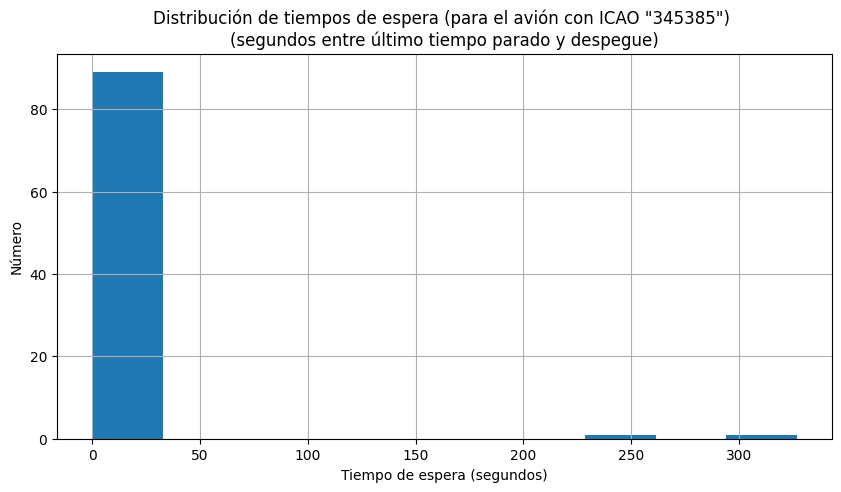

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385.tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 1 minuto, hay que ver que ocurre para tiempos menores de 50 segundos solo (hacemos un zoom en el histograma anterior)

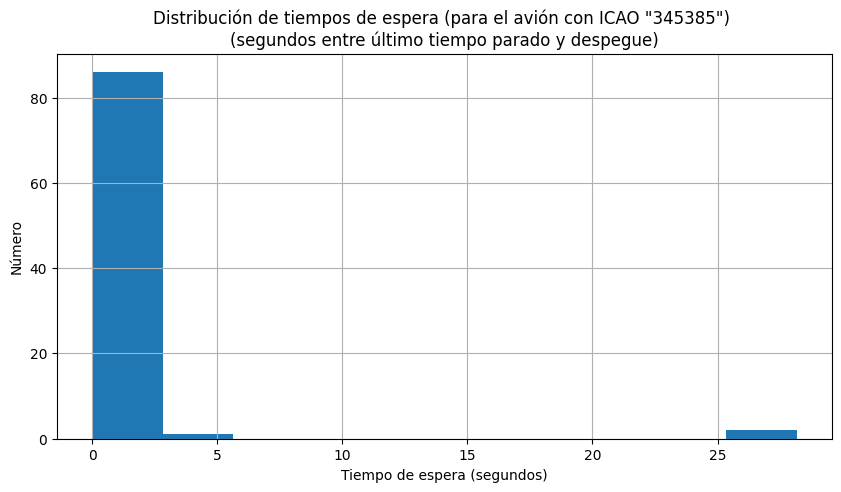

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385[df_345385.tiempo_espera < 50].tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 5 segundos, seguro que se trata de un error.

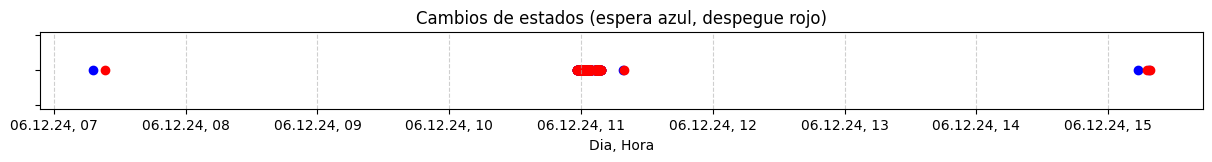

In [19]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Dia, Hora")
myFmt = mdates.DateFormatter('%d.%m.%y, %H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

Todos los datos son para **del 6 de DICIEMBRE**

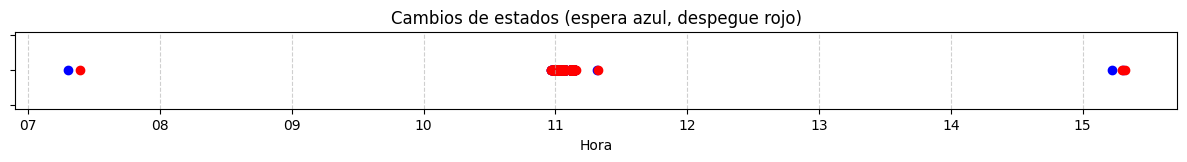

In [20]:
fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Hora")
myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

### Boxplot

In [22]:
import seaborn as sns

In [26]:
df = pd.read_csv('../../data/eventos_despegues.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ICAO            911 non-null    object 
 1   ultimo_parado   911 non-null    object 
 2   despegue        911 non-null    object 
 3   tiempo_espera   911 non-null    float64
 4   fecha_despegue  911 non-null    object 
 5   hora_despegue   911 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 42.8+ KB


In [28]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            911 non-null    object        
 1   ultimo_parado   911 non-null    datetime64[ns]
 2   despegue        911 non-null    datetime64[ns]
 3   tiempo_espera   911 non-null    float64       
 4   fecha_despegue  911 non-null    object        
 5   hora_despegue   911 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 42.8+ KB


In [30]:
df['tiempo_espera'].describe()

count      911.000000
mean       411.290880
std       2714.242938
min          0.000000
25%         23.078000
50%         31.521000
75%        387.545500
max      64956.712000
Name: tiempo_espera, dtype: float64

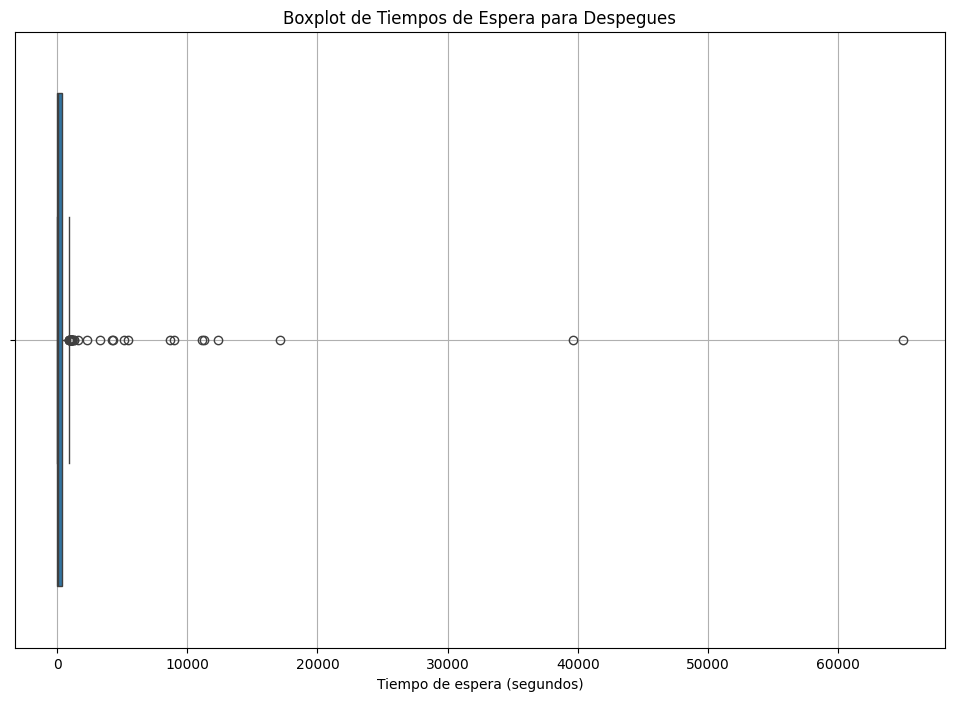

In [31]:
plt.figure(figsize=(12, 8))  # Tamaño de la figura
sns.boxplot(x=df['tiempo_espera'])
plt.title('Boxplot de Tiempos de Espera para Despegues')  # Título del gráfico
plt.xlabel('Tiempo de espera (segundos)')  # Etiqueta del eje X
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()